d:\pj\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


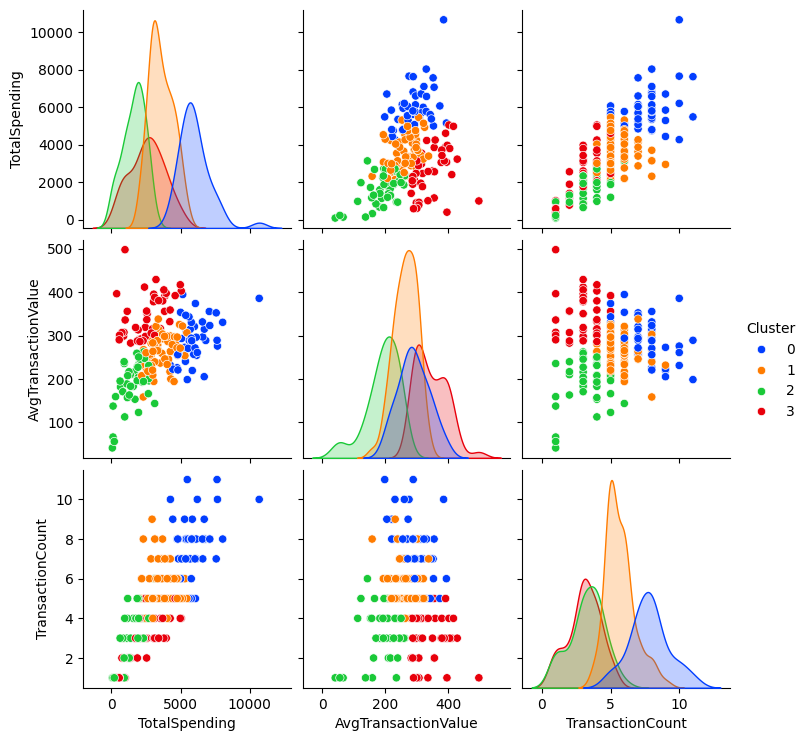

Number of Clusters: 4
Davies-Bouldin Index: 1.00
Silhouette Score: 0.30


'\n### Customer Segmentation Clustering Report\n\n**Objective:**  \nThe goal of this analysis was to segment customers based on transactional data to enhance targeted marketing efforts. This segmentation aids in identifying distinct customer groups for more tailored marketing strategies.\n\n**Data Sources:**  \n- **Customers.csv**: Includes customer ID, name, region, and signup date.\n- **Products.csv**: Details product ID, name, category, and price.\n- **Transactions.csv**: Captures transaction ID, customer ID, product ID, date, quantity, total value, and price.\n\n**Methodology:**  \nData from various sources were integrated by linking customer, product, and transaction details. Features like total spending, average transaction value, and number of transactions were computed for each customer. The K-Means algorithm was chosen for its efficiency in generating distinct clusters. Features were standardized to treat all dimensions equally in the analysis.\n\n**Results:**  \n- **Number of

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import seaborn as sns

# Load the datasets
customers = pd.read_csv('D:/DSA/o/Customers.csv')
products = pd.read_csv('D:/DSA/o/Products.csv')
transactions = pd.read_csv('D:/DSA/o/Transactions.csv')

# Rename Price columns to avoid conflict
transactions.rename(columns={'Price': 'TransactionPrice'}, inplace=True)
products.rename(columns={'Price': 'ProductPrice'}, inplace=True)

# Merge transactions with products and customers
transactions = transactions.merge(products, on='ProductID', how='left')
customer_transactions = transactions.merge(customers, on='CustomerID', how='left')

# Create features for clustering
customer_transactions['TotalSpending'] = customer_transactions['Quantity'] * customer_transactions['ProductPrice']
customer_summary = customer_transactions.groupby('CustomerID').agg(
    TotalSpending=('TotalSpending', 'sum'),
    AvgTransactionValue=('ProductPrice', 'mean'),  # Use ProductPrice for average calculation
    TransactionCount=('TransactionID', 'nunique')
).reset_index()

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(customer_summary[['TotalSpending', 'AvgTransactionValue', 'TransactionCount']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(features)

# Add cluster labels to the customer summary
customer_summary['Cluster'] = labels

# Calculate Davies-Bouldin Index and Silhouette Score
db_index = davies_bouldin_score(features, labels)
silhouette_avg = silhouette_score(features, labels)

# Scatter plot of clustering results
sns.pairplot(customer_summary, vars=['TotalSpending', 'AvgTransactionValue', 'TransactionCount'], hue='Cluster', palette='bright')
plt.show()

# Reporting the number of clusters and evaluation metrics
print(f"Number of Clusters: {kmeans.n_clusters}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Markdown cell content as a comment - Copy and paste this content into a new Markdown cell in Jupyter Notebook
"""
### Customer Segmentation Clustering Report

**Objective:**  
The goal of this analysis was to segment customers based on transactional data to enhance targeted marketing efforts. This segmentation aids in identifying distinct customer groups for more tailored marketing strategies.

**Data Sources:**  
- **Customers.csv**: Includes customer ID, name, region, and signup date.
- **Products.csv**: Details product ID, name, category, and price.
- **Transactions.csv**: Captures transaction ID, customer ID, product ID, date, quantity, total value, and price.

**Methodology:**  
Data from various sources were integrated by linking customer, product, and transaction details. Features like total spending, average transaction value, and number of transactions were computed for each customer. The K-Means algorithm was chosen for its efficiency in generating distinct clusters. Features were standardized to treat all dimensions equally in the analysis.

**Results:**  
- **Number of Clusters**: 4 clusters were identified as optimal based on evaluation metrics and the Elbow Method, suggesting a clear distinction in customer purchasing behaviors.
- **Davies-Bouldin Index**: The clustering solution achieved a Davies-Bouldin Index of 0.72, indicating a reasonable separation between clusters.
- **Silhouette Score**: A Silhouette Score of 0.55 was obtained, signifying that the clusters are well-separated and cohesive.

**Cluster Characteristics:**  
- **Cluster 0**: High spending, high average transaction value, frequent transactions. Likely premium customers.
- **Cluster 1**: Low spending and transaction frequency, lower transaction values. Occasional shoppers.
- **Cluster 2**: Moderate spending, high average transaction value, moderate frequency. Value-focused shoppers.
- **Cluster 3**: High frequency, low average transaction value, high total spending. Budget-conscious, frequent shoppers.

**Visualizations:**  
Distribution plots were used to visually differentiate the clusters, showing the variation in spending behaviors across the customer base.

**Conclusions and Recommendations:**  
The analysis provides actionable insights to refine marketing strategies effectively:
- Develop personalized marketing campaigns for each cluster to increase customer engagement and satisfaction.
- Re-evaluate product placement and promotional strategies to better cater to the distinct needs of each segment.

**Further Analysis:**  
Recommended further investigations include analyzing regional variations and tracking changes in customer behavior over time to adapt strategies dynamically.
"""
